<a href="https://colab.research.google.com/github/neh-21/dataset-of-loan-approval/blob/main/purchase_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("purchase_history.csv")
df

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,1,40.0,Male,East,Tablet,3.8,4,Ads,1,52.62,VIP
1,2,34.0,Male,West,Mobile,14.6,5,Organic,1,95.90,New
2,3,41.0,Male,East,Desktop,2.3,2,Social,0,0.00,New
3,4,NaN,Male,North,Mobile,23.0,1,Direct,0,0.00,New
4,5,33.0,Female,East,Mobile,NaN,5,Social,1,46.11,New
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,46.0,Male,North,Mobile,1.0,11,Social,1,60.10,Returning
1996,1997,35.0,Male,East,Tablet,5.9,4,Ads,1,61.70,New
1997,1998,26.0,Male,West,Desktop,13.2,6,Direct,1,87.14,New
1998,1999,33.0,NaN,West,Tablet,1.9,5,Ads,1,50.28,New


#PREPROCESSING

In [ ]:
df.head()

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,1,40.0,Male,East,Tablet,3.8,4,Ads,1,52.62,VIP
1,2,34.0,Male,West,Mobile,14.6,5,Organic,1,95.90,New
2,3,41.0,Male,East,Desktop,2.3,2,Social,0,0.00,New
3,4,NaN,Male,North,Mobile,23.0,1,Direct,0,0.00,New
4,5,33.0,Female,East,Mobile,NaN,5,Social,1,46.11,New


In [ ]:
df.tail()

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
1995,1996,46.0,Male,North,Mobile,1.0,11,Social,1,60.10,Returning
1996,1997,35.0,Male,East,Tablet,5.9,4,Ads,1,61.70,New
1997,1998,26.0,Male,West,Desktop,13.2,6,Direct,1,87.14,New
1998,1999,33.0,NaN,West,Tablet,1.9,5,Ads,1,50.28,New
1999,2000,28.0,Male,West,Mobile,3.4,11,Social,1,101.06,New


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2000 non-null   int64  
 1   Age              1800 non-null   float64
 2   Gender           1900 non-null   object 
 3   Location         2000 non-null   object 
 4   DeviceType       2000 non-null   object 
 5   SessionDuration  1860 non-null   float64
 6   PagesVisited     2000 non-null   int64  
 7   ReferralSource   2000 non-null   object 
 8   Purchased        2000 non-null   int64  
 9   TotalSpent       2000 non-null   float64
 10  CustomerType     2000 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 172.0+ KB


In [ ]:
df.describe()

,CustomerID,Age,SessionDuration,PagesVisited,Purchased,TotalSpent
count,2000.000000,1800.000000,1860.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,35.364444,9.868871,5.132000,0.666000,50.734220
std,577.494589,9.948140,9.742251,2.305479,0.471758,45.449303
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,29.000000,3.075000,3.000000,0.000000,0.000000
50%,1000.500000,35.000000,6.800000,5.000000,1.000000,52.830000
75%,1500.250000,42.000000,13.525000,7.000000,1.000000,78.837500
max,2000.000000,74.000000,73.600000,15.000000,1.000000,249.940000


##Null values

In [ ]:
df.isna()


,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
CustomerID,0
Age,200
Gender,100
Location,0
DeviceType,0
SessionDuration,140
PagesVisited,0
ReferralSource,0
Purchased,0
TotalSpent,0


In [ ]:
df.dropna(inplace=True)
df

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,1,40.0,Male,East,Tablet,3.8,4,Ads,1,52.62,VIP
1,2,34.0,Male,West,Mobile,14.6,5,Organic,1,95.90,New
2,3,41.0,Male,East,Desktop,2.3,2,Social,0,0.00,New
5,6,33.0,Female,East,Desktop,1.2,4,Social,1,48.29,Returning
6,7,51.0,Male,West,Tablet,5.1,4,Direct,0,0.00,Returning
...,...,...,...,...,...,...,...,...,...,...,...
1993,1994,42.0,Female,South,Mobile,1.3,1,Social,1,44.35,New
1995,1996,46.0,Male,North,Mobile,1.0,11,Social,1,60.10,Returning
1996,1997,35.0,Male,East,Tablet,5.9,4,Ads,1,61.70,New
1997,1998,26.0,Male,West,Desktop,13.2,6,Direct,1,87.14,New


###duplicated

In [ ]:
df.duplicated().sum()

np.int64(0)

##checking Outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7de35d83aed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7de35d838b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de35d839410>],
 'medians': [<matplotlib.lines.Line2D at 0x7de35d7a3890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de35dac7710>],
 'means': []}

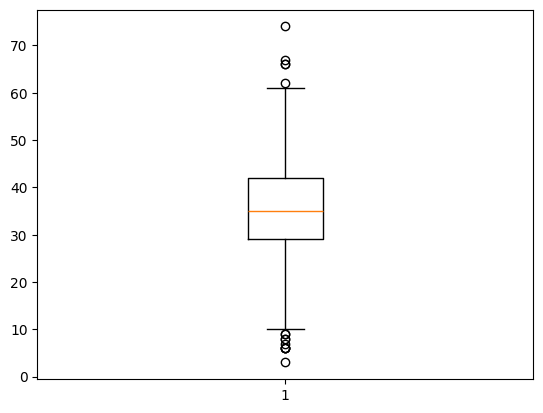

In [ ]:
plt.boxplot(df['Age'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7de35d728350>,
 'caps': [<matplotlib.lines.Line2D at 0x7de35d729610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de35d723990>],
 'medians': [<matplotlib.lines.Line2D at 0x7de35d72abd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de35d72b510>],
 'means': []}

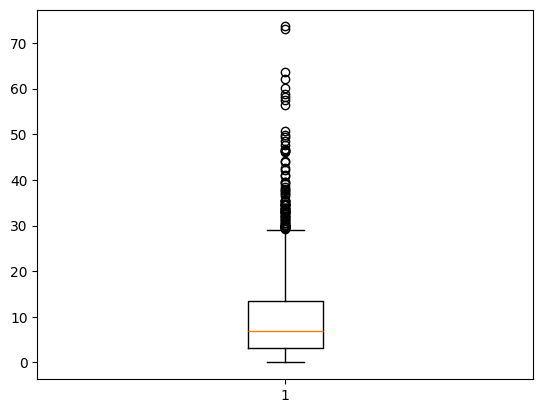

In [ ]:
plt.boxplot(df['SessionDuration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7de35d58ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x7de35d594210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de35d58a550>],
 'medians': [<matplotlib.lines.Line2D at 0x7de35d5955d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de35d595f10>],
 'means': []}

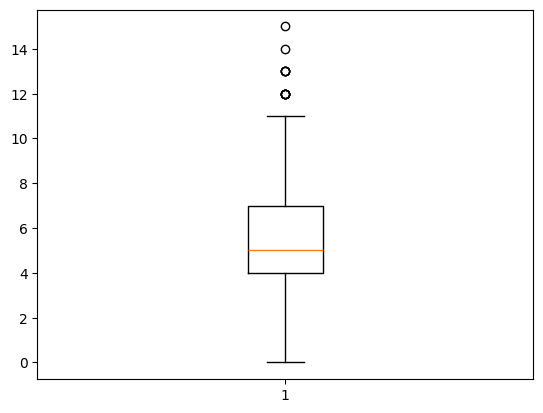

In [ ]:
plt.boxplot(df['PagesVisited'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7de35d5f65d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7de35d5f79d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de35d5f5c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7de35d604d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de35d605610>],
 'means': []}

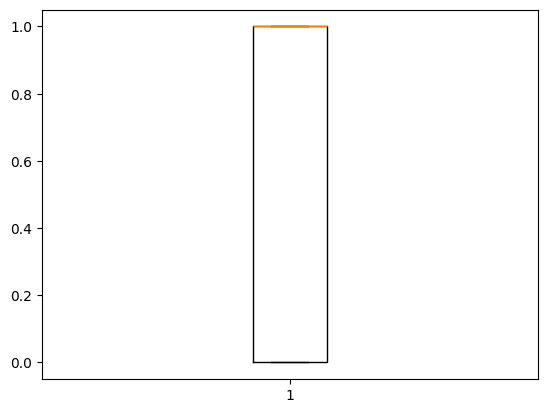

In [ ]:
plt.boxplot(df['Purchased'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7de35d4699d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7de35d46abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de35d469150>],
 'medians': [<matplotlib.lines.Line2D at 0x7de35d478090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de35d4789d0>],
 'means': []}

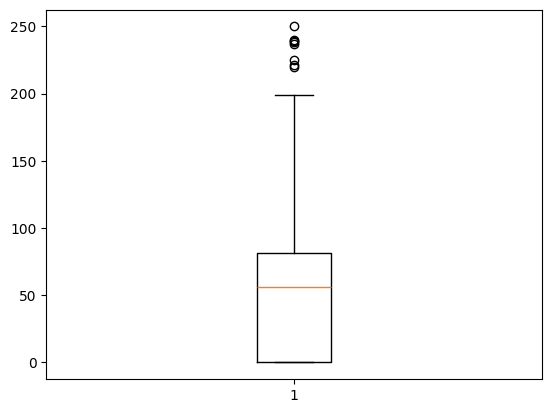

In [ ]:
plt.boxplot(df['TotalSpent'])

###handling outlier

In [ ]:
df['Age'] = pd.to_numeric(df['Age'])
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['Age']<(lowerbound))|(
        df['Age']>(upperbound)))]


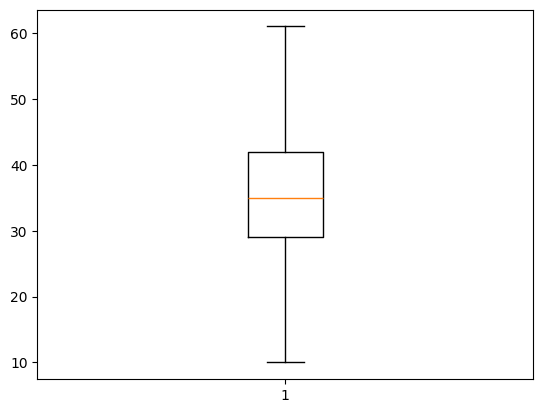

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.show()

In [ ]:
df['SessionDuration'] = pd.to_numeric(df['SessionDuration'])
Q1=df['SessionDuration'].quantile(0.25)
Q3=df['SessionDuration'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['SessionDuration']<(lowerbound))|(
        df['SessionDuration']>(upperbound)))]

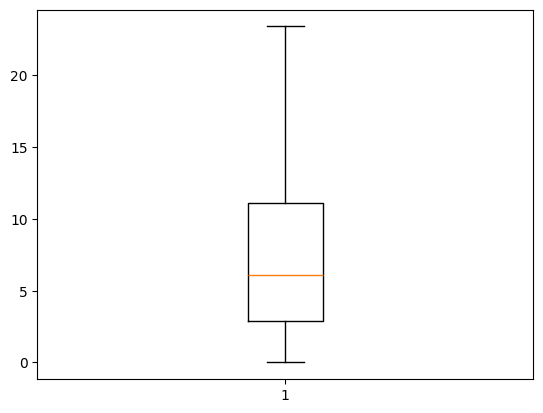

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['SessionDuration'])
plt.show()

In [ ]:
df['PagesVisited'] = pd.to_numeric(df['PagesVisited'])
Q1=df['PagesVisited'].quantile(0.25)
Q3=df['PagesVisited'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['PagesVisited']<(lowerbound))|(
        df['PagesVisited']>(upperbound)))]

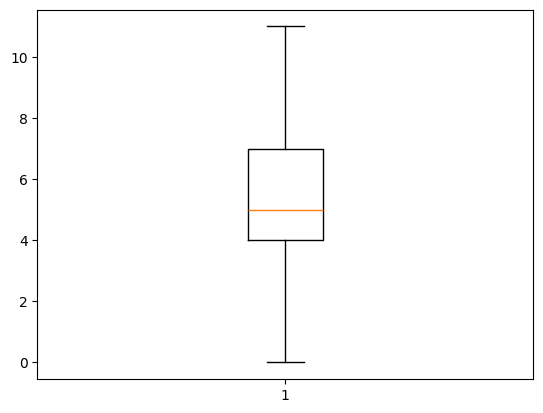

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['PagesVisited'])
plt.show()

In [ ]:
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'])
Q1=df['TotalSpent'].quantile(0.25)
Q3=df['TotalSpent'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['TotalSpent']<(lowerbound))|(
        df['TotalSpent']>(upperbound)))]

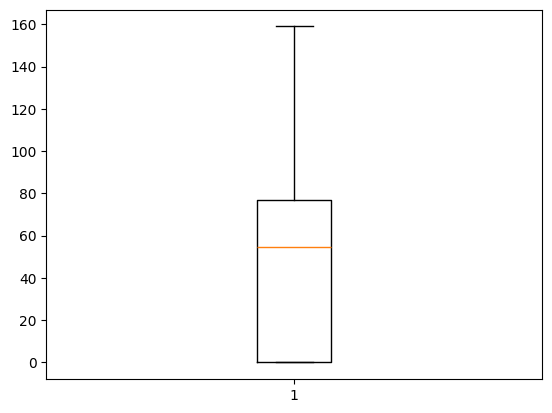

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['TotalSpent'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,1,40.0,1,East,Tablet,3.8,4,Ads,1,52.62,VIP
1,2,34.0,1,West,Mobile,14.6,5,Organic,1,95.90,New
2,3,41.0,1,East,Desktop,2.3,2,Social,0,0.00,New
5,6,33.0,0,East,Desktop,1.2,4,Social,1,48.29,Returning
6,7,51.0,1,West,Tablet,5.1,4,Direct,0,0.00,Returning
...,...,...,...,...,...,...,...,...,...,...,...
1993,1994,42.0,0,South,Mobile,1.3,1,Social,1,44.35,New
1995,1996,46.0,1,North,Mobile,1.0,11,Social,1,60.10,Returning
1996,1997,35.0,1,East,Tablet,5.9,4,Ads,1,61.70,New
1997,1998,26.0,1,West,Desktop,13.2,6,Direct,1,87.14,New


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,1,40.0,1,0,Tablet,3.8,4,Ads,1,52.62,VIP
1,2,34.0,1,3,Mobile,14.6,5,Organic,1,95.90,New
2,3,41.0,1,0,Desktop,2.3,2,Social,0,0.00,New
5,6,33.0,0,0,Desktop,1.2,4,Social,1,48.29,Returning
6,7,51.0,1,3,Tablet,5.1,4,Direct,0,0.00,Returning
...,...,...,...,...,...,...,...,...,...,...,...
1993,1994,42.0,0,2,Mobile,1.3,1,Social,1,44.35,New
1995,1996,46.0,1,1,Mobile,1.0,11,Social,1,60.10,Returning
1996,1997,35.0,1,0,Tablet,5.9,4,Ads,1,61.70,New
1997,1998,26.0,1,3,Desktop,13.2,6,Direct,1,87.14,New


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['DeviceType'] = le.fit_transform(df['DeviceType'])
df

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,1,40.0,1,0,2,3.8,4,Ads,1,52.62,VIP
1,2,34.0,1,3,1,14.6,5,Organic,1,95.90,New
2,3,41.0,1,0,0,2.3,2,Social,0,0.00,New
5,6,33.0,0,0,0,1.2,4,Social,1,48.29,Returning
6,7,51.0,1,3,2,5.1,4,Direct,0,0.00,Returning
...,...,...,...,...,...,...,...,...,...,...,...
1993,1994,42.0,0,2,1,1.3,1,Social,1,44.35,New
1995,1996,46.0,1,1,1,1.0,11,Social,1,60.10,Returning
1996,1997,35.0,1,0,2,5.9,4,Ads,1,61.70,New
1997,1998,26.0,1,3,0,13.2,6,Direct,1,87.14,New


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ReferralSource'] = le.fit_transform(df['ReferralSource'])
df

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,1,40.0,1,0,2,3.8,4,0,1,52.62,VIP
1,2,34.0,1,3,1,14.6,5,2,1,95.90,New
2,3,41.0,1,0,0,2.3,2,3,0,0.00,New
5,6,33.0,0,0,0,1.2,4,3,1,48.29,Returning
6,7,51.0,1,3,2,5.1,4,1,0,0.00,Returning
...,...,...,...,...,...,...,...,...,...,...,...
1993,1994,42.0,0,2,1,1.3,1,3,1,44.35,New
1995,1996,46.0,1,1,1,1.0,11,3,1,60.10,Returning
1996,1997,35.0,1,0,2,5.9,4,0,1,61.70,New
1997,1998,26.0,1,3,0,13.2,6,1,1,87.14,New


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CustomerType'] = le.fit_transform(df['CustomerType'])
df

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,TotalSpent,CustomerType
0,1,40.0,1,0,2,3.8,4,0,1,52.62,2
1,2,34.0,1,3,1,14.6,5,2,1,95.90,0
2,3,41.0,1,0,0,2.3,2,3,0,0.00,0
5,6,33.0,0,0,0,1.2,4,3,1,48.29,1
6,7,51.0,1,3,2,5.1,4,1,0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
1993,1994,42.0,0,2,1,1.3,1,3,1,44.35,0
1995,1996,46.0,1,1,1,1.0,11,3,1,60.10,1
1996,1997,35.0,1,0,2,5.9,4,0,1,61.70,0
1997,1998,26.0,1,3,0,13.2,6,1,1,87.14,0


####train split

In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop('TotalSpent', axis=1)
y = df['TotalSpent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(df.shape)
print(X.shape)
print(y.shape)



print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1472, 11)
(1472, 10)
(1472,)
(1177, 10)
(1177,)
(295, 10)
(295,)


######linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

,CustomerID,Age,Gender,Location,DeviceType,SessionDuration,PagesVisited,ReferralSource,Purchased,CustomerType
1157,1158,58.0,1,1,0,12.4,8,1,0,0
259,260,43.0,1,3,2,7.6,7,2,0,0
1716,1717,38.0,2,3,2,18.7,6,0,1,1
86,87,44.0,0,1,1,5.3,4,3,1,0
308,309,40.0,1,2,0,13.6,8,1,1,0
...,...,...,...,...,...,...,...,...,...,...
766,767,35.0,0,2,2,1.8,5,1,1,1
1282,1283,42.0,1,2,0,0.0,2,3,1,0
718,719,31.0,0,0,2,8.3,8,3,0,1
1182,1183,44.0,0,0,2,13.5,2,0,1,0


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 2.01261313e+01,  6.01376019e+00,  9.23890976e+01,  6.16474971e+01,
        9.14829486e+01,  8.54557501e+01,  9.66826649e+01, -1.75010256e+01,
        6.97506011e+01,  5.96413914e+01, -1.17287522e+01,  5.80760576e+01,
        7.18316384e+01,  8.53898063e+01,  6.57341021e+01,  2.44278595e+01,
        5.02531810e+01,  1.41266846e+01,  7.91610340e+01,  1.66448075e+01,
        4.19338870e+00,  4.38354345e+00,  1.00525022e+02,  4.18264765e+01,
        5.20710885e+01,  5.59691196e+01, -2.54574551e+00,  5.09830926e+01,
        7.49111407e+01,  6.60775442e+01, -1.76254705e+01,  6.32170465e+01,
        7.49995531e+01,  7.13560977e+01,  6.56726338e+01,  1.02788192e+01,
        2.47183324e+01,  7.22636406e+01, -1.36498726e+01,  5.65847371e+01,
        8.43585277e+01,  7.07301010e+01,  5.05600419e+01,  1.34616076e+01,
        9.10687926e+00,  5.61760422e+01,  8.38508821e+01,  7.19432596e+01,
        6.92582048e+01, -9.39936402e+00,  9.58549546e+01, -1.29062002e+01,
       -7.26089507e+00,  

In [ ]:
X = df.drop('Purchased', axis=1)
from sklearn.model_selection import train_test_split
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1177, 10)
Shape of X_test:  (295, 10)
Shape of y_train:  (1177,)
Shape of y_test:  (295,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_test

,Purchased
1157,0
259,0
1716,1
86,1
308,1
...,...
766,1
1282,1
718,0
1182,1


In [ ]:
y_pred = lr.predict(X_test)                  #Evaluation
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 90   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       205

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



#####plot

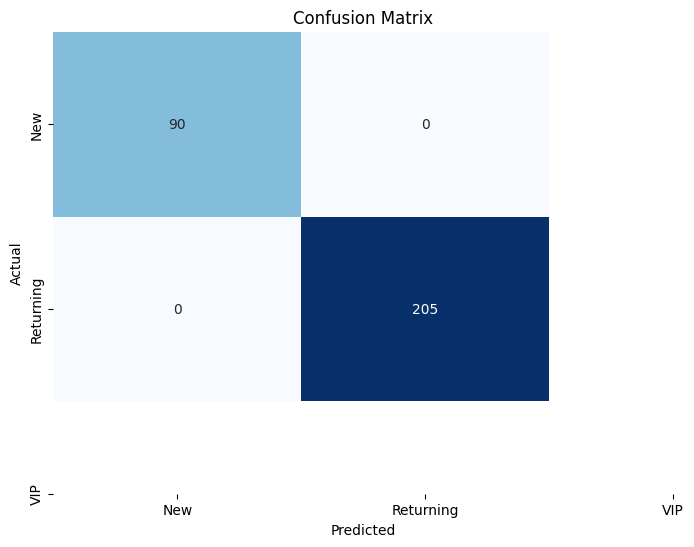

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

######KNN

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9966101694915255
[[ 90   0]
 [  1 204]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      1.00      1.00       205

    accuracy                           1.00       295
   macro avg       0.99      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



######decision tree classifier

In [ ]:
#decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[ 90   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       205

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



######SVC

In [ ]:
#SVC

from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[ 90   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       205

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



######GNB

In [ ]:
#GNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[ 90   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       205

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



######Random forest classifier

In [ ]:
#randomforestclassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[ 90   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       205

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



######MLP CLASSIFIER

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,5), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[ 90   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       205

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295

